In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
from PIL import Image

In [2]:
import mglearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve


from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer

In [3]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default") # 경고문 다시 뜨도록

- 분류 알고리즘의 가장 기본적인 알고리즘
- 연속형 변수를 범주형 변수로 바꿔준다고 봐도 무방함
- 선형회귀분석에서 비선형회귀분석으로 바뀐 것(1차항 -> 2차항, 직선 -> 곡선)
- 딥러닝에서 사용되는 유일한 알고리즘
- https://losskatsu.github.io/statistics/logistic-regression/#
- https://devopedia.org/confusion-matrix


- 로지스틱 회귀 공식
- -z: wx+b 가중치 합(wx)에 바이어스(b)를 더한 값
![수식](https://latex.codecogs.com/svg.latex?\Large\hat{y}=\frac{1}{1+e^{-z}})
<img width="300" height="200" src="https://render.githubusercontent.com/render/math?math=\sigma(x) = \frac{1}{1 %2B e^{-x}}">

# 1. Sigmoid

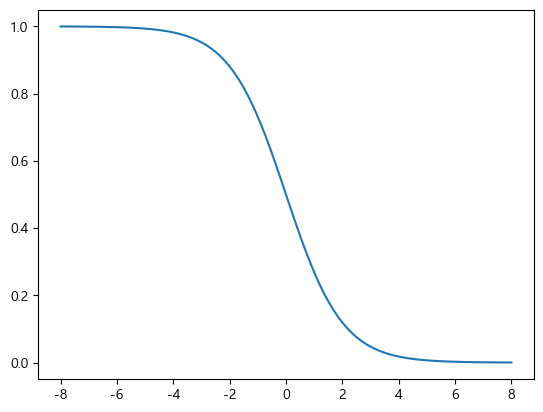

In [4]:
X = np.linspace(-8, 8, 100)
X

result = []
for i in X:
    result.append(1/(1 + np.exp(i))) # np.exp() 지수함수
    
plt.plot(X, result)

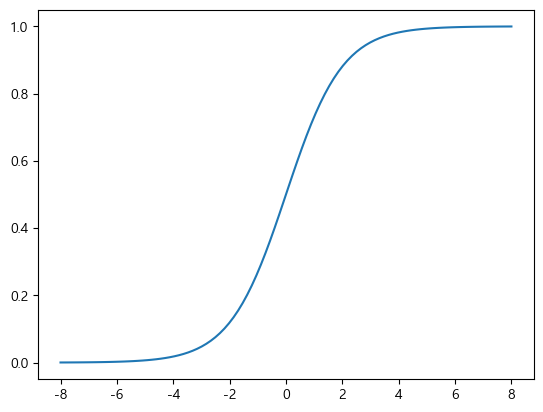

In [5]:
X = np.linspace(-8, 8, 100)
X

result = []
for i in X:
    result.append(1/(1 + np.exp(-i))) # np.exp() 지수함수
    
plt.plot(X, result)

- 0보다 절대 작을 수 없고, 1보다 절대 클 수 없음

# 2. 알고리즘 비교

- L2 Norm 규제(Regularization) 사용
- C 파라미터를 사용해서 규제의 강도를 설정

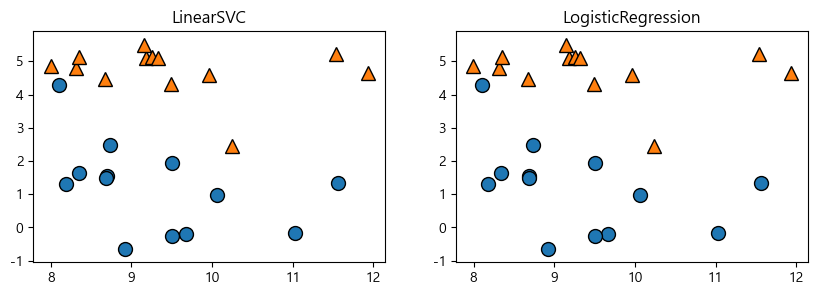

In [6]:
X, y = mglearn.datasets.make_forge()

_, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes): # C default = 1
    clf = model.fit(X, y)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)

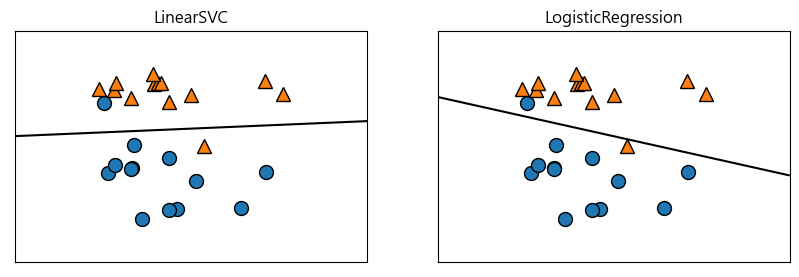

In [7]:
X, y = mglearn.datasets.make_forge()

_, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes):
    clf = model.fit(X, y)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)
    ax.set_title(clf.__class__.__name__)

- 선형회귀분석은 하이퍼 파라미터가 없어서 릿지, 라쏘 등을 사용했지만
- 로지스틱은 하이퍼 파라미터가 존재함
- 규제가 느슨해질수록 모델이 복잡해진다
- 규제를 강하게 할수록 모델이 단순해진다

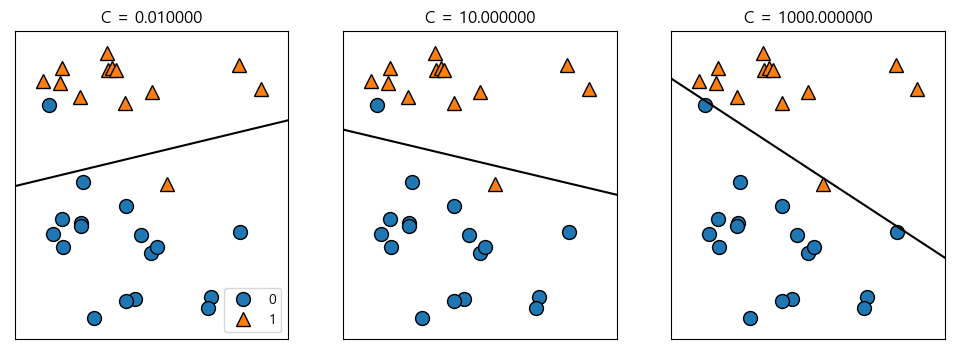

In [8]:
mglearn.plots.plot_linear_svc_regularization()

# 3. C값에 따른 변화

In [9]:
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [11]:
logreg = LogisticRegression(C=1, max_iter = 10000).fit(X_train, y_train) # max_iter = 100 default

print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test))

훈련 점수 :  0.960093896713615
테스트 점수 :  0.951048951048951


In [12]:
logreg1000 = LogisticRegression(C=1000, max_iter = 10000).fit(X_train, y_train) # max_iter = 100 default

print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test))

훈련 점수 :  0.960093896713615
테스트 점수 :  0.951048951048951


In [13]:
logreg0001 = LogisticRegression(C=0.0001, max_iter = 10000).fit(X_train, y_train) # max_iter = 100 default

print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test))

훈련 점수 :  0.960093896713615
테스트 점수 :  0.951048951048951


In [14]:
clist = [0.001, 0.1, 1, 100, 1000, 10000, 100000]
for i in clist:
    logreg = LogisticRegression(C=i, max_iter = 10000).fit(X_train, y_train)

    print("------------------------------------------------")
    print("파라미터(C) :", i)
    print("훈련 점수 : ", logreg.score(X_train, y_train))
    print("테스트 점수 : ", logreg.score(X_test, y_test))

------------------------------------------------
파라미터(C) : 0.001
훈련 점수 :  0.9507042253521126
테스트 점수 :  0.9370629370629371
------------------------------------------------
파라미터(C) : 0.1
훈련 점수 :  0.9577464788732394
테스트 점수 :  0.9440559440559441
------------------------------------------------
파라미터(C) : 1
훈련 점수 :  0.960093896713615
테스트 점수 :  0.951048951048951
------------------------------------------------
파라미터(C) : 100
훈련 점수 :  0.9812206572769953
테스트 점수 :  0.965034965034965
------------------------------------------------
파라미터(C) : 1000
훈련 점수 :  0.9906103286384976
테스트 점수 :  0.951048951048951
------------------------------------------------
파라미터(C) : 10000
훈련 점수 :  0.9906103286384976
테스트 점수 :  0.9440559440559441
------------------------------------------------
파라미터(C) : 100000
훈련 점수 :  0.9882629107981221
테스트 점수 :  0.9440559440559441


In [15]:
clist = [1, 100, 1000, 10000, 100000]
best_score_train = 0
best_score_test = 0
best_C = 0

for i in clist:
    logreg = LogisticRegression(C=i, max_iter=10000).fit(X_train, y_train)

    train_score = logreg.score(X_train, y_train)
    test_score = logreg.score(X_test, y_test)
    
    print("------------------------------------------------")
    print("파라미터(C) :", i)
    print("훈련 점수 : ", train_score)
    print("테스트 점수 : ", test_score)

    if train_score > best_score_train:
        best_score_train = train_score
        
    if test_score > best_score_test:
        best_score_test = test_score
        best_C = i

print("------------------------------------------------")
print("최적의 C 값 :", best_C)
print("최적의 훈련 :", best_score_train)
print("최적의 점수 :", best_score_test)

------------------------------------------------
파라미터(C) : 1
훈련 점수 :  0.960093896713615
테스트 점수 :  0.951048951048951
------------------------------------------------
파라미터(C) : 100
훈련 점수 :  0.9812206572769953
테스트 점수 :  0.965034965034965
------------------------------------------------
파라미터(C) : 1000
훈련 점수 :  0.9906103286384976
테스트 점수 :  0.951048951048951
------------------------------------------------
파라미터(C) : 10000
훈련 점수 :  0.9906103286384976
테스트 점수 :  0.9440559440559441
------------------------------------------------
파라미터(C) : 100000
훈련 점수 :  0.9882629107981221
테스트 점수 :  0.9440559440559441
------------------------------------------------
최적의 C 값 : 100
최적의 훈련 : 0.9906103286384976
최적의 점수 : 0.965034965034965


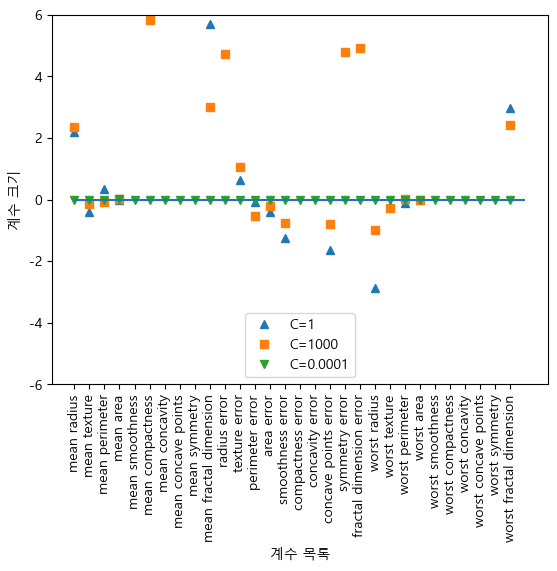

In [16]:
plt.plot(logreg.coef_.T, "^", label="C=1")
plt.plot(logreg1000.coef_.T, "s", label="C=1000")
plt.plot(logreg0001.coef_.T, "v", label="C=0.0001")




plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-6, 6)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.show()

In [17]:
logreg_l1 = LogisticRegression(C=1, max_iter = 10000, penalty="l1", solver="liblinear").fit(X_train, y_train) # max_iter = 100 default

print("훈련 점수 : ", logreg_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1.score(X_test, y_test))

훈련 점수 :  0.9624413145539906
테스트 점수 :  0.958041958041958


In [18]:
logreg1000_l1 = LogisticRegression(C=1000, max_iter = 10000, penalty="l1", solver="liblinear").fit(X_train, y_train) # max_iter = 100 default

print("훈련 점수 : ", logreg1000_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg1000_l1.score(X_test, y_test))

훈련 점수 :  0.9906103286384976
테스트 점수 :  0.9440559440559441


In [19]:
logreg0001_l1 = LogisticRegression(C=0.0001, max_iter = 10000, penalty="l1", solver="liblinear").fit(X_train, y_train) # max_iter = 100 default

print("훈련 점수 : ", logreg0001_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg0001_l1.score(X_test, y_test))

훈련 점수 :  0.3732394366197183
테스트 점수 :  0.3706293706293706


# 4. 알고리즘 별 성능 비교
- KNN
- Linear SVC
- Logistic Regression

In [20]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

## (1) 기본 옵션으로 비교

### 1) LogisticRegression

In [21]:
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("테스트 점수 :", model.score(X_test, y_test))

테스트 점수 : 0.965034965034965


### 2) LinearSVC

In [22]:
model2 = LinearSVC(max_iter=10000).fit(X_train, y_train)
print("테스트 점수 :", model2.score(X_test, y_test))

테스트 점수 : 0.8601398601398601


### 3) KNN

In [23]:
model3 = KNeighborsClassifier().fit(X_train, y_train)
print("테스트 점수 :", model3.score(X_test, y_test))

테스트 점수 : 0.965034965034965


## (2) 이상치 확인

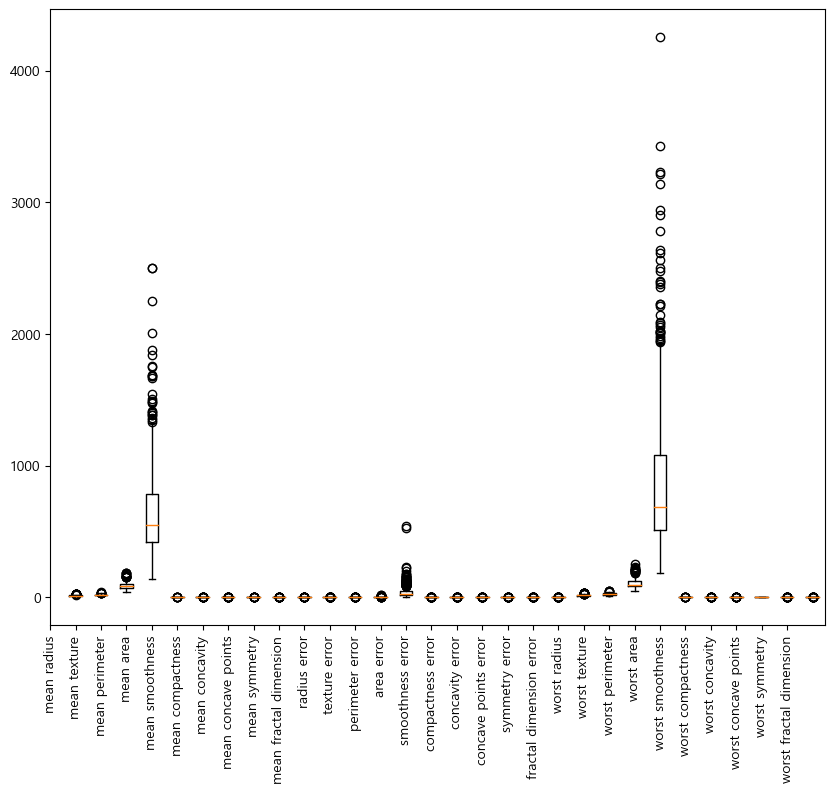

In [24]:
plt.figure(figsize=(10,8))
plt.boxplot(cancer.data)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.show()

In [25]:
#### 표준화

m = cancer.data.mean(axis=0)
s = cancer.data.std(axis=0)

std_data = (cancer.data - m)/s

In [26]:
std_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

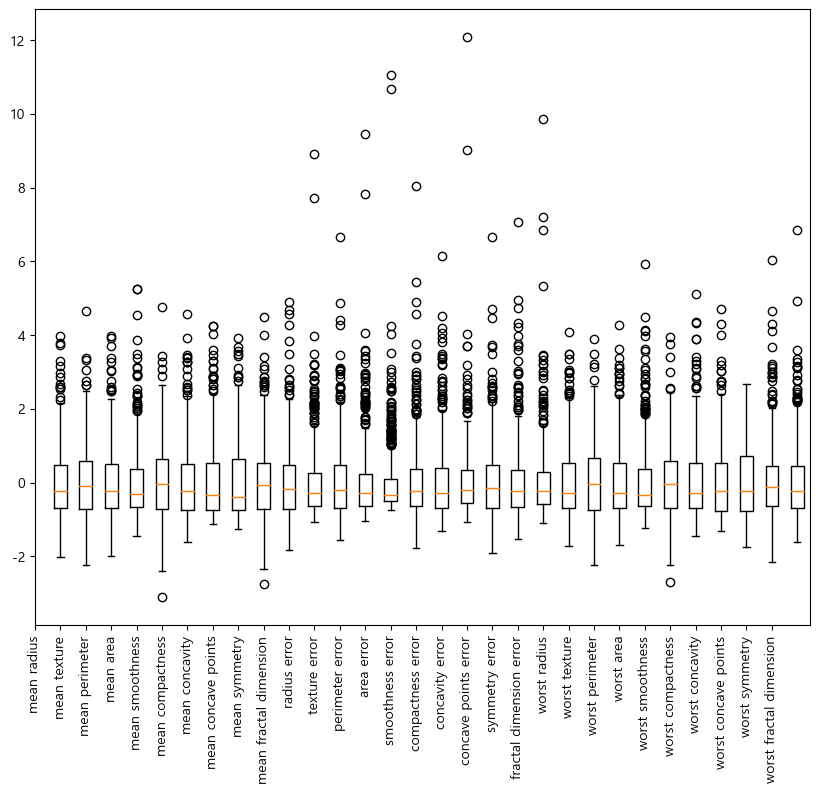

In [27]:
plt.figure(figsize=(10,8))
plt.boxplot(std_data)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.show()

#### 표준화 이후 각 알고리즘 별 분석

In [28]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(std_data, cancer.target, random_state=42)

In [29]:
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("테스트 점수 :", model.score(X_test, y_test))

테스트 점수 : 0.9790209790209791


In [30]:
model2 = LinearSVC(max_iter=10000).fit(X_train, y_train)
print("테스트 점수 :", model2.score(X_test, y_test))

테스트 점수 : 0.965034965034965


In [31]:
model3 = KNeighborsClassifier().fit(X_train, y_train)
print("테스트 점수 :", model3.score(X_test, y_test))

테스트 점수 : 0.958041958041958


## (3) 하이퍼 파라미터 튜닝

In [32]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(std_data, cancer.target, random_state=42)

In [33]:
model1 = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, y_train)
print("테스트 점수 :", model.score(X_test, y_test))

테스트 점수 : 0.9790209790209791


In [34]:
model2 = LinearSVC(C=0.01, max_iter=10000).fit(X_train, y_train)
print("테스트 점수 :", model2.score(X_test, y_test))

테스트 점수 : 0.993006993006993


In [35]:
model3 = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
print("테스트 점수 :", model3.score(X_test, y_test))

테스트 점수 : 0.972027972027972


# 5. 다중 분류

In [36]:
from sklearn.datasets import make_blobs

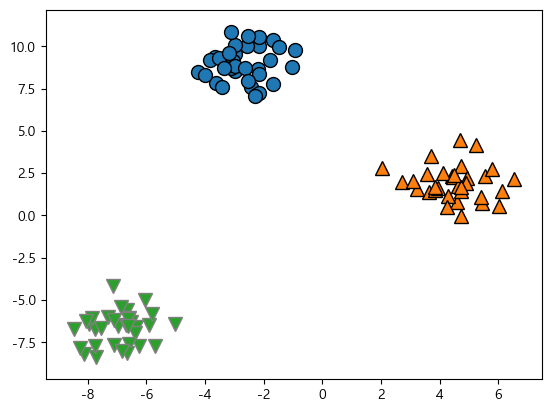

In [37]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [38]:
model = LinearSVC().fit(X, y)
print(model.coef_)

[[-0.17492656  0.23139971]
 [ 0.47621636 -0.06936507]
 [-0.18914202 -0.20399605]]


In [39]:
model2 = LogisticRegression().fit(X,y)
print(model2.coef_)

[[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]


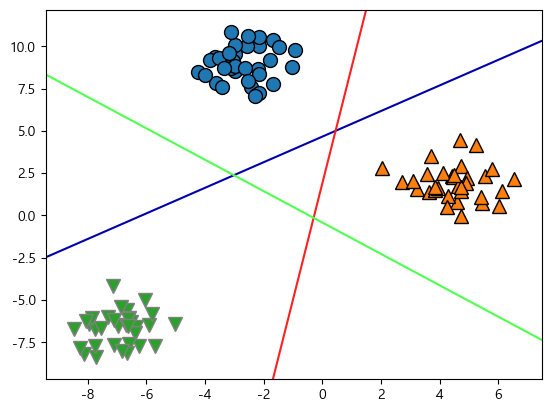

In [40]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
xline = np.linspace(-15, 15)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    plt.plot(xline, -(xline*coef[0] + intercept) / coef[1], c=color)
    
#mglearn.plots.plot_2d_classification(model, X, fill=True, alpha=0.6)

# 6. 평가

- 정확도(Accuracy)
- 오차 행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 Score(조화 평균 : 정밀도, 재현율)
- ROC, AUC

## (1) 오차 행렬
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함꼐 나타내는 지표
- TN, TP, FN, FP

![Image description](https://devopedia.org/images/article/208/9787.1566189818.png)
- TP = 1, 1 : 예측값이 긍정이고 실제값도 긍정
- TN = 0, 0 : 예측값이 부정이고 실제값도 부정
- FP : 예측값은 긍정이지만 실제값은 부정
- FN : 예측값은 부정이지만 실제값은 긍정

In [41]:
from sklearn.datasets import load_digits

In [42]:
digits = load_digits()
print(digits.data.shape)
print(digits.data)
print(digits.target)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [43]:
y = (digits.target ==7).astype(int)

In [44]:
pd.Series(y).value_counts()
# 7이 아닌게 1618
# 7인게 179

0    1618
1     179
dtype: int64

In [45]:
len(digits.data[0]) # 이미지가 64개 # 8행 8열

64

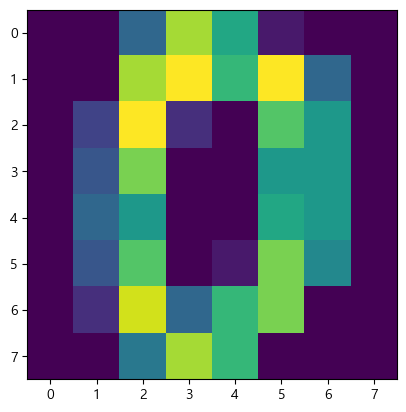

In [46]:
plt.imshow(digits.data[0].reshape(8,8)) # 위에서 얻은 8,8을 토대로 reshape

In [47]:
from sklearn.base import BaseEstimator

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [48]:
np.zeros((64, 1), dtype=bool)

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [49]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=42)

model = MyFakeClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("정확도 :", accuracy_score(y_test, pred))

정확도 : 0.9088888888888889


In [50]:
confusion_matrix(y_test, pred) # 0,1 순서가 defualt

array([[409,   0],
       [ 41,   0]], dtype=int64)

        예측
- 실TN(409) FN(0)
- 제FP(41) TP(0)

|||예측||
|------|---|---|---|
|||Negative(0)|Positive(1)|
|실제|Negative(0)|TN(409)|FN(0)|
||Positive(1)|FP(41)|TP(0)|

- 위의 혼동 행렬(confusion matrix)은 이진 분류(binary classification) 모델의 결과를 나타냅니다. 이 모델은 2개의 클래스(positive, negative) 중 하나를 예측하는데, 예측이 맞았을 경우는 True라고 하며, 틀렸을 경우는 False라고 합니다.

- True와 False 둘 중 하나는 실제(real) 클래스와 예측(predicted) 클래스 간의 일치 여부를 나타내는데, True는 일치, False는 불일치를 의미합니다.

- 409는 실제로 negative인데 모델이 negative로 예측한 데이터의 개수(TN)를 의미합니다.
- 0은 실제로 positive인데 모델이 negative로 예측한 데이터의 개수(FN)를 의미합니다.

- 41은 실제로 positive인데 모델이 negative로 예측한 데이터의 개수(FP)를 의미합니다.
- 0은 실제로 negative인데 모델이 positive로 예측한 데이터의 개수(TP)를 의미합니다.

In [51]:
confusion_matrix(y_test, pred, labels=[1,0]) # 1,0 순서로 바꿔주자

array([[  0,  41],
       [  0, 409]], dtype=int64)

|||실제||
|------|---|---|---|
|||Positive(1)|Negative(0)|
|예측|Positive(1)|TP(0)|FP(41)|
||Negative(0)|FN(0)|TN(409)|

![Image description](https://editor.analyticsvidhya.com/uploads/70456have%20cancer.jpg)

## (2) 정확도

- 예측 결과과 동일한 데이터 건수 / 전체 예측 데이터 건수
- (TP + TN) / (TP + TN + FP + FN)

In [52]:
(409 + 0) / (409 + 0 + 41 + 0)

0.9088888888888889

## (3) 정밀도와 재현율

- Positive(양성)의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 암인 사람을 찾는 목표일 경우, 암에 걸린 사람이 positive
- 암이 아닌 사람을 찾는 목표일 경우, 암에 안걸린 사람이 positive
- 정밀도 : TP / (EP+TP)
    - 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
    - 실제 음성 데이터를 양성으로 잘 못 판단하게 되면 업무상 큰 영향이 발생하는 경우에 중요한 지표
        - 스팸 메일 판정
- 재현율 : TP / (FN + TP)
    - 실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
    - 실제 양성 데이터를 음성으로 잘 못 판단하게 되면 업무상 큰 영향이 발생하는 경우에 중요한 지표
        - 암 환자 판정, 보험 사기 판정
    - 민감도(Sensitive) 또는 TPR(True Positive Rate)라고도 한다.


## (4) F1 Score

- 정밀도와 재현율의 조화평균(Harmonic Mean)
- ((정밀도 * 재현율) / (정밀도 + 재현율)) * 2

## (5) ROC, AUC

In [53]:
from sklearn.datasets import make_classification

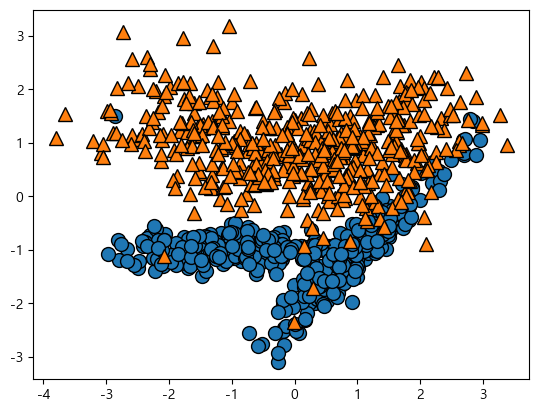

In [54]:
X, y = make_classification(n_samples = 1000, n_features = 2, random_state = 0, n_informative=2, n_redundant=0)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [55]:
model = LogisticRegression().fit(X, y)

In [56]:
y_hat = model.predict(X)

In [57]:
print(y_hat[:30])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1]


In [58]:
print(y[:30])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1]


In [59]:
confusion_matrix(y, y_hat)

array([[477,  20],
       [ 28, 475]], dtype=int64)

In [60]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       497
           1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [61]:
# fpr : False Positive Rate(거짓 양성 비율)
# tpr : True Positive Rate(재현율)
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

Text(0, 0.5, 'True Positive Rate(recall)')

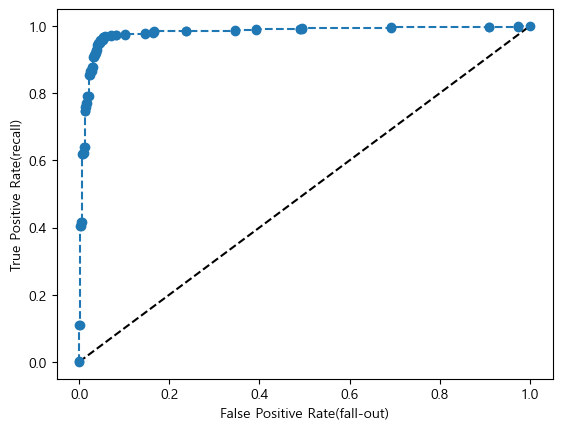

In [62]:
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, "o--")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")

- 왼쪽 상단의 모서리에 가까울수록 좋은 성능이다
- 대각선에 가까울수록 안좋은 성능이다
- 이진분류인 경우에만 이와 같이 ROC그래프로 표현이 가능하다

# 7. 실습

## (1) 타이타닉 생존자 분류하기

In [63]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1) 결측치 제거

In [65]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Cabin"].fillna("N", inplace=True)
df["Embarked"].fillna("N", inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2) 불필요한 변수 제거

In [67]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- 머신러닝은 이유를 불문하고 숫자로 다 바꿔줘야하는데 object가 보인다

### 3) 문자들을 숫자화 : LabelEncoder + (OneHotEncoder)

In [69]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [71]:
df["Cabin"] = df["Cabin"].str[:1] # Cabin의 앞글자1개만 남겨두기

In [72]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [73]:
features = ["Cabin", "Sex", "Embarked"]

for f in features:
    le = LabelEncoder()
    le.fit(df[f])
    df[f] = le.transform(df[f])

In [74]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


![Image description](https://i.stack.imgur.com/DL0iQ.jpg)

In [75]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [78]:
model = LogisticRegression(max_iter = 1000000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000000)

In [79]:
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print("정확도 : ", acc)

정확도 :  0.8212290502793296


In [80]:
confusion_matrix(y_test, pred)

array([[91, 14],
       [18, 56]], dtype=int64)

|||예측||
|------|---|---|---|
|||Negative(0)|Positive(1)|
|실제|Negative(0)|TN(91)|FN(14)|
||Positive(1)|FP(18)|TP(56)|

In [81]:
from sklearn.metrics import precision_score, recall_score
# 정밀도: TP / (FP + TP)    56 / 14+56
# 재현율: TP / (FN + TP)    56 / 18+56

print("정밀도:", 56 / (14+56))
print("재현율:", 56 / (18+56))
print("정밀도 : ", precision_score(y_test, pred))
print("재현율 : ",recall_score(y_test, pred))

정밀도: 0.8
재현율: 0.7567567567567568
정밀도 :  0.8
재현율 :  0.7567567567567568


In [82]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Text(0, 0.5, 'True Positive Rate(recall)')

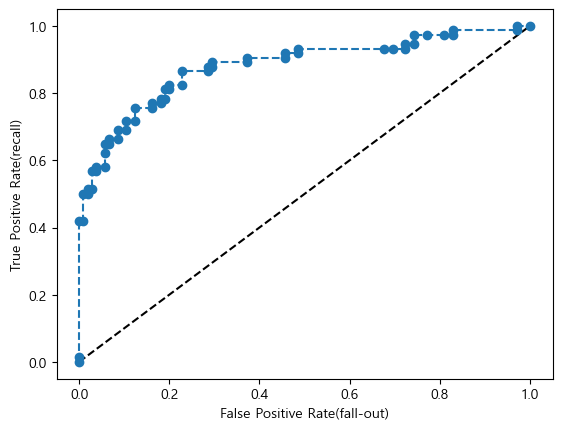

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
plt.plot([0,1], [0, 1], 'k--')
plt.plot(fpr, tpr, "o--")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")

## (2) 여행자 보험 데이터

In [84]:
data = pd.read_csv("data/TravelInsurance.csv")
data.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,400000,6,1,Government Sector,Yes,No,No,0
1,31,1250000,7,0,Private Sector/Self Employed,Yes,No,No,0
2,34,500000,4,1,Private Sector/Self Employed,Yes,No,No,1
3,28,700000,3,1,Private Sector/Self Employed,Yes,No,No,0
4,28,700000,8,1,Private Sector/Self Employed,Yes,Yes,No,0


In [85]:
data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   AnnualIncome         1987 non-null   int64 
 2   FamilyMembers        1987 non-null   int64 
 3   ChronicDiseases      1987 non-null   int64 
 4   Employment Type      1987 non-null   object
 5   GraduateOrNot        1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [87]:
data["Employment Type"].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

In [88]:
data["Employment Type"] = data["Employment Type"].str[:1]

### 1) 특성과 레이블 나누기

In [89]:
X = data.drop("TravelInsurance", axis = 1)
y = data["TravelInsurance"]

### 2) train, test 데이터 셋 나누기

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3) 연속, 범주형 데이터 나누기 및 통합

- 훈련용 나누기

In [91]:
X_train

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
1271,25,500000,4,1,P,Yes,No,No
1805,29,1200000,4,0,P,Yes,No,No
365,25,1700000,3,0,P,No,Yes,No
1007,34,1000000,6,0,P,Yes,No,No
1232,31,350000,4,1,G,No,No,No
...,...,...,...,...,...,...,...,...
1130,28,550000,5,0,P,Yes,Yes,No
1294,28,600000,4,0,P,Yes,No,No
860,34,1000000,4,1,P,Yes,No,No
1459,34,1500000,5,1,P,Yes,Yes,Yes


In [92]:
train_num = X_train[X_train.columns[0:4]] # 연속형 변수(숫자)
train_num.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
1271,25,500000,4,1
1805,29,1200000,4,0
365,25,1700000,3,0
1007,34,1000000,6,0
1232,31,350000,4,1


In [93]:
train_cat = X_train[X_train.columns[4:]] # 범주형 변수(문자)
train_cat.head()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
1271,P,Yes,No,No
1805,P,Yes,No,No
365,P,No,Yes,No
1007,P,Yes,No,No
1232,G,No,No,No


In [94]:
train_cat = pd.get_dummies(train_cat)
train_cat.head()

,Employment Type_G,Employment Type_P,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
1271,0,1,0,1,1,0,1,0
1805,0,1,0,1,1,0,1,0
365,0,1,1,0,0,1,1,0
1007,0,1,0,1,1,0,1,0
1232,1,0,1,0,1,0,1,0


In [104]:
# 합칠 때 문제가 되는 경우가 많기 때문에 이상하게 배치된 인덱스를 지워주자
train_cat = train_cat.reset_index(drop=True)
train_cat

,Employment Type_G,Employment Type_P,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,0,1,0,1,1,0,1,0
1,0,1,0,1,1,0,1,0
2,0,1,1,0,0,1,1,0
3,0,1,0,1,1,0,1,0
4,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
1584,0,1,0,1,0,1,1,0
1585,0,1,0,1,1,0,1,0
1586,0,1,0,1,1,0,1,0
1587,0,1,0,1,0,1,0,1


In [105]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Employment Type_G        1589 non-null   uint8
 1   Employment Type_P        1589 non-null   uint8
 2   GraduateOrNot_No         1589 non-null   uint8
 3   GraduateOrNot_Yes        1589 non-null   uint8
 4   FrequentFlyer_No         1589 non-null   uint8
 5   FrequentFlyer_Yes        1589 non-null   uint8
 6   EverTravelledAbroad_No   1589 non-null   uint8
 7   EverTravelledAbroad_Yes  1589 non-null   uint8
dtypes: uint8(8)
memory usage: 12.5 KB


- 테스트 데이터 나누기

In [106]:
test_num = X_test[X_test.columns[0:4]] # 연속형 변수(숫자)
test_num.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
212,28,750000,5,1
1517,26,1400000,4,1
785,29,1200000,7,0
1175,33,400000,4,1
1760,34,1500000,3,0


In [107]:
test_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 212 to 478
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              398 non-null    int64
 1   AnnualIncome     398 non-null    int64
 2   FamilyMembers    398 non-null    int64
 3   ChronicDiseases  398 non-null    int64
dtypes: int64(4)
memory usage: 15.5 KB


In [108]:
test_cat = X_test[X_test.columns[4:]] # 범주형 변수(문자)
test_cat.head()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
212,P,Yes,No,No
1517,P,Yes,No,Yes
785,P,Yes,No,Yes
1175,G,Yes,No,No
1760,P,Yes,Yes,Yes


In [109]:
test_cat = pd.get_dummies(test_cat)
test_cat.head()

,Employment Type_G,Employment Type_P,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
212,0,1,0,1,1,0,1,0
1517,0,1,0,1,1,0,0,1
785,0,1,0,1,1,0,0,1
1175,1,0,0,1,1,0,1,0
1760,0,1,0,1,0,1,0,1


In [110]:
# 합칠 때 문제가 되는 경우가 많기 때문에 이상하게 배치된 인덱스를 지워주자
test_cat = test_cat.reset_index(drop=True)
test_cat

,Employment Type_G,Employment Type_P,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,0,1,0,1,1,0,1,0
1,0,1,0,1,1,0,0,1
2,0,1,0,1,1,0,0,1
3,1,0,0,1,1,0,1,0
4,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
393,0,1,0,1,1,0,1,0
394,0,1,1,0,1,0,1,0
395,0,1,1,0,1,0,0,1
396,1,0,0,1,1,0,1,0


In [111]:
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Employment Type_G        398 non-null    uint8
 1   Employment Type_P        398 non-null    uint8
 2   GraduateOrNot_No         398 non-null    uint8
 3   GraduateOrNot_Yes        398 non-null    uint8
 4   FrequentFlyer_No         398 non-null    uint8
 5   FrequentFlyer_Yes        398 non-null    uint8
 6   EverTravelledAbroad_No   398 non-null    uint8
 7   EverTravelledAbroad_Yes  398 non-null    uint8
dtypes: uint8(8)
memory usage: 3.2 KB


In [112]:
minmax = MinMaxScaler()
minmax.fit(train_num) # fit은 train에만 해주면 test는 자동으로 생성됨

train_scaled = minmax.transform(train_num)
test_scaled = minmax.transform(test_num)

In [113]:
train_scaled

array([[0.        , 0.13333333, 0.28571429, 1.        ],
       [0.4       , 0.6       , 0.28571429, 0.        ],
       [0.        , 0.93333333, 0.14285714, 0.        ],
       ...,
       [0.9       , 0.46666667, 0.28571429, 1.        ],
       [0.9       , 0.8       , 0.42857143, 1.        ],
       [0.4       , 0.6       , 0.28571429, 0.        ]])

In [114]:
test_scaled

array([[0.3       , 0.3       , 0.42857143, 1.        ],
       [0.1       , 0.73333333, 0.28571429, 1.        ],
       [0.4       , 0.6       , 0.71428571, 0.        ],
       ...,
       [0.        , 0.7       , 0.42857143, 1.        ],
       [0.8       , 0.53333333, 0.14285714, 0.        ],
       [0.4       , 0.4       , 0.28571429, 0.        ]])

In [115]:
train_final = pd.concat([pd.DataFrame(train_scaled), train_cat], axis=1, ignore_index=True)

In [116]:
test_final = pd.concat([pd.DataFrame(test_scaled), test_cat], axis=1, ignore_index=True)

In [117]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1589 non-null   float64
 1   1       1589 non-null   float64
 2   2       1589 non-null   float64
 3   3       1589 non-null   float64
 4   4       1589 non-null   uint8  
 5   5       1589 non-null   uint8  
 6   6       1589 non-null   uint8  
 7   7       1589 non-null   uint8  
 8   8       1589 non-null   uint8  
 9   9       1589 non-null   uint8  
 10  10      1589 non-null   uint8  
 11  11      1589 non-null   uint8  
dtypes: float64(4), uint8(8)
memory usage: 62.2 KB


In [118]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    float64
 2   2       398 non-null    float64
 3   3       398 non-null    float64
 4   4       398 non-null    uint8  
 5   5       398 non-null    uint8  
 6   6       398 non-null    uint8  
 7   7       398 non-null    uint8  
 8   8       398 non-null    uint8  
 9   9       398 non-null    uint8  
 10  10      398 non-null    uint8  
 11  11      398 non-null    uint8  
dtypes: float64(4), uint8(8)
memory usage: 15.7 KB


### 4) 학습

In [119]:
model = LogisticRegression(max_iter=10000).fit(train_final, y_train)
print("테스트 점수 :", model.score(test_final, y_test))

테스트 점수 : 0.7638190954773869


In [120]:
model2 = LinearSVC(max_iter=10000).fit(train_final, y_train)
print("테스트 점수 :", model2.score(test_final, y_test))

테스트 점수 : 0.7537688442211056


In [121]:
model3 = KNeighborsClassifier().fit(train_final, y_train)
print("테스트 점수 :", model3.score(test_final, y_test))

테스트 점수 : 0.7587939698492462


In [122]:
pred = model.predict(test_final)
acc = accuracy_score(y_test, pred)
print("정확도 : ", acc)

정확도 :  0.7638190954773869


### 5) 튜닝(GridSearchCV, RandomSearchCV)

In [128]:
knn = KNeighborsClassifier(n_neighbors=3)

params = {"n_neighbors" : [1,3,5,7,9,11]}

grid_knn = GridSearchCV(knn, params, cv= 10)

grid_knn.fit(train_final, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [129]:
pred = grid_knn.predict(test_final)
accuracy_score(y_test, pred)

0.7587939698492462

In [139]:
score_df = pd.DataFrame(grid_knn.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003208,0.001243,0.005266,0.003503,1,{'n_neighbors': 1},0.691824,0.691824,0.716981,0.716981,0.754717,0.679245,0.754717,0.685535,0.723270,0.753165,0.716826,0.028063,6
1,0.003424,0.006163,0.003637,0.006190,3,{'n_neighbors': 3},0.767296,0.742138,0.723270,0.754717,0.748428,0.754717,0.811321,0.786164,0.786164,0.791139,0.766535,0.025410,5
2,0.004690,0.007164,0.004686,0.007157,5,{'n_neighbors': 5},0.779874,0.792453,0.761006,0.798742,0.754717,0.742138,0.805031,0.792453,0.798742,0.822785,0.784794,0.023819,1
3,0.003125,0.006249,0.006248,0.007652,7,{'n_neighbors': 7},0.735849,0.836478,0.773585,0.779874,0.754717,0.761006,0.786164,0.779874,0.805031,0.791139,0.780372,0.026396,3
4,0.003124,0.006247,0.004680,0.007150,9,{'n_neighbors': 9},0.723270,0.817610,0.786164,0.767296,0.761006,0.767296,0.767296,0.798742,0.786164,0.803797,0.777864,0.025349,4
5,0.004695,0.007171,0.004685,0.007156,11,{'n_neighbors': 11},0.754717,0.842767,0.773585,0.786164,0.754717,0.767296,0.779874,0.779874,0.779874,0.803797,0.782267,0.024441,2


In [140]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'n_neighbors': 5}
0.7847942042830985


In [133]:
from scipy.stats import randint, uniform

In [134]:
params = {"n_neighbors" : randint(low=1, high=9)}

random_knn = RandomizedSearchCV(knn, params, cv= 5, n_iter = 10)

random_knn.fit(train_final, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C67B64E0D0>})

In [136]:
pred = random_knn.predict(test_final)
accuracy_score(y_test, pred)

0.7814070351758794

In [137]:
score_df = pd.DataFrame(random_knn.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002205,0.001839,0.011314,0.005591,5,{'n_neighbors': 5},0.783019,0.783019,0.767296,0.767296,0.810726,0.782271,0.015870,5
1,0.001993,0.001667,0.010473,0.004754,8,{'n_neighbors': 8},0.798742,0.786164,0.754717,0.779874,0.804416,0.784783,0.017380,2
2,0.005611,0.006080,0.006732,0.006001,4,{'n_neighbors': 4},0.776730,0.776730,0.761006,0.789308,0.810726,0.782900,0.016558,4
3,0.003722,0.006059,0.006958,0.007220,3,{'n_neighbors': 3},0.751572,0.732704,0.761006,0.792453,0.785489,0.764645,0.021964,8
4,0.003124,0.006248,0.009373,0.007653,8,{'n_neighbors': 8},0.798742,0.786164,0.754717,0.779874,0.804416,0.784783,0.017380,2
5,0.003124,0.006248,0.009373,0.007653,6,{'n_neighbors': 6},0.779874,0.801887,0.757862,0.779874,0.813880,0.786675,0.019464,1
6,0.003723,0.006062,0.008890,0.008333,1,{'n_neighbors': 1},0.691824,0.701258,0.698113,0.688679,0.747634,0.705502,0.021531,10
7,0.001666,0.001381,0.010696,0.006764,7,{'n_neighbors': 7},0.776730,0.792453,0.761006,0.770440,0.801262,0.780378,0.014624,6
8,0.004321,0.005807,0.005354,0.006134,3,{'n_neighbors': 3},0.751572,0.732704,0.761006,0.792453,0.785489,0.764645,0.021964,8
9,0.001995,0.001669,0.012403,0.004170,2,{'n_neighbors': 2},0.754717,0.751572,0.757862,0.770440,0.791798,0.765278,0.014726,7


In [138]:
print(random_knn.best_params_)
print(random_knn.best_score_)

{'n_neighbors': 6}
0.7866753963057755


### 6) 성능 평가

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
##### 오차를 이용한 성능 평가
pred = model.predict(test_final)
pred_grid = grid_knn.predict(test_final)
pred_random = random_knn.predict(test_final)

In [145]:
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, pred_grid))
print(accuracy_score(y_test, pred_random))

0.7638190954773869
0.7587939698492462
0.7814070351758794


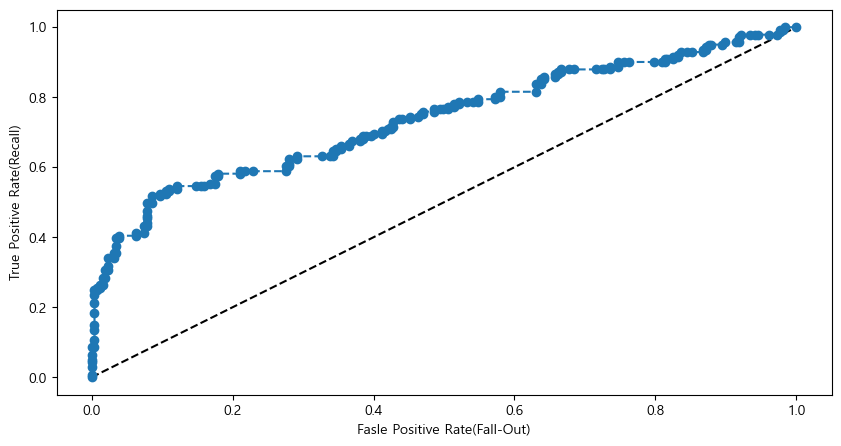

In [149]:
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(test_final))

plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, "o--")
plt.xlabel("Fasle Positive Rate(Fall-Out)")
plt.ylabel("True Positive Rate(Recall)")
plt.show()

# 8. 다중 분류일 때의 오차 행렬

In [103]:
data = [[9, 1, 0, 0],
        [1, 15, 3, 1],
        [5, 0, 24, 1],
        [0, 4, 1, 15]]

<AxesSubplot:>

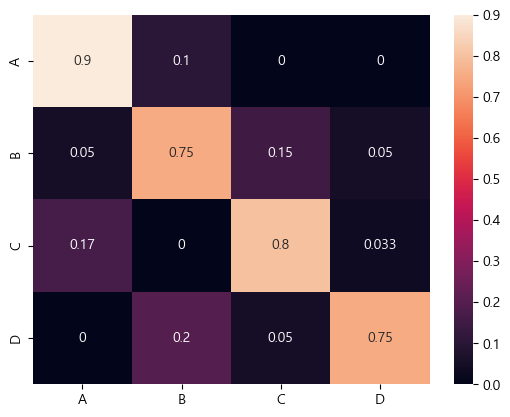

In [107]:
df = pd.DataFrame(data, index=[i for i in "ABCD"],
            columns=[i for i in "ABCD"])
df

sns.heatmap(df, annot=True)

In [105]:
total = np.sum(data, axis=1)
data = data / total[:, None]
data

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

<AxesSubplot:>

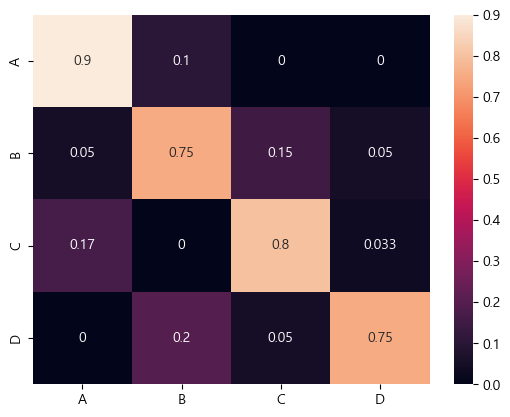

In [106]:
df = pd.DataFrame(data, index=[i for i in "ABCD"],
            columns=[i for i in "ABCD"])
df

sns.heatmap(df, annot=True)

In [108]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

<AxesSubplot:>

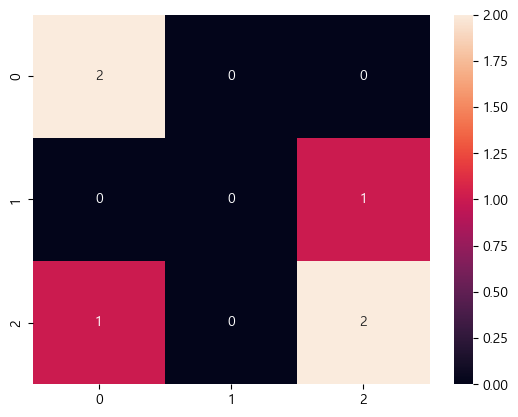

In [110]:
data2 = confusion_matrix(y_true, y_pred)
data2

df = pd.DataFrame(data2, index=[i for i in "012"],
            columns=[i for i in "012"])
df

sns.heatmap(df, annot=True)

- 다중분류일 때는 히트맵으로 표현을 많이한다